In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
1,2600,4,120.0
6,2732,4,135.0
11,2785,4,140.0
5,1170,2,38.0
16,1180,3,48.0


In [5]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaling_X = sx.fit_transform(df.drop('price', axis='columns'))
scaling_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaling_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
scaling_Y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
scaling_Y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

#Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction


price = w1*area +w*area +bias

Now is the time to implement mini batch gradient descent.

In [21]:
def batch_gd(X, y_true, epochs, learning_rate=0.01):
    number_of_features =X.shape[1]
    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list =[]
    for i in range(epochs):
        y_predicted = np.dot(X,w.T)+b
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate *w_grad
        b = b - learning_rate *b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost_list,epoch_list

w,b,cost, epoch_list= batch_gd(scaling_X,scaling_Y.reshape(scaling_Y.shape[0],),500)

print(w,b)
print(cost)

[0.70712464 0.67456527] -0.23034857438407427
[0.2768777174681, 0.16573507027671064, 0.10212908135956808, 0.06564235879682481, 0.04463022365578522, 0.03245122421764872, 0.025317339083010492, 0.021067914076635823, 0.01847041893523527, 0.016821657535428185, 0.015720331469182485, 0.014937329116527901, 0.014341749105819087, 0.0138587099774241, 0.013445288028074867, 0.013076793952344979, 0.012738945874049962, 0.012423405193086517, 0.012125230310262438, 0.011841424159334757, 0.011570105565415722, 0.011310036391930275, 0.01106035160957391, 0.010820405104702651, 0.010589681505198633, 0.010367745666240432, 0.010154213642862602, 0.009948735925187012, 0.009750987675343718, 0.009560662965348804, 0.009377471304274599, 0.009201135478234784, 0.009031390146006546, 0.008867980872255637, 0.008710663416728342, 0.008559203175573597, 0.008413374715338717, 0.008272961365501463, 0.008137754849850727, 0.00800755494527638, 0.007882169161242129, 0.0077614124359100785, 0.007645106846431061, 0.007533081331802613, 

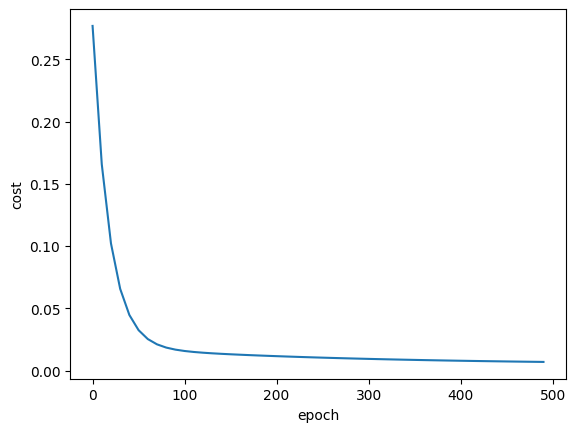

In [22]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost)

In [23]:
def predict(area, bedrooms, w, b):
    scaling_X = sx.transform([[area, bedrooms]])[0]
    scaled_prices = w[0]*scaling_X[0] + w[1]*scaling_X[1] +b
    return sy.inverse_transform([[scaled_prices]])[0][0]


predict(2600,4,w,b)

C:\Users\VAIBHAVRAI\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [24]:
predict(12332,5,w,b)

C:\Users\VAIBHAVRAI\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


471.57814528166557

stochastic gradient descent

Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [56]:
import random
def stochastic_gd(X,y_true,epochs, learning_rate = 0.01):
    num_of_features = X.shape[1]
    w= np.ones(shape=(num_of_features))
    b= 0
    total_samples= X.shape[0]
    
    cost_list= []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_X = X[random_index]
        sample_Y  = y_true[random_index]
    
        y_predicted= np.dot(w,sample_X.T)+b
        w_grad = -(2/total_samples)*(sample_X.T.dot(sample_Y-y_predicted))
        b_grad = -(2/total_samples)*(sample_Y-y_predicted)
        
        cost = np.square(sample_Y - y_predicted)
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w,b, cost_list,epoch_list 
w_sgd, b_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gd(scaling_X,scaling_Y.reshape(scaling_Y.shape[0],),10000)
print(w_sgd,b_sgd)
print(cost)

[1. 1.] 0
0.4267276367705177


In [57]:
w, b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

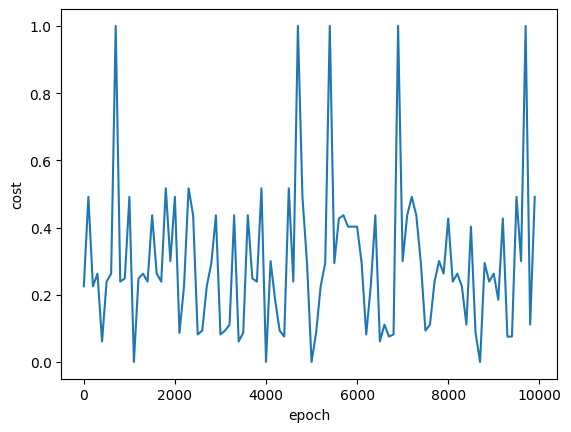

In [60]:

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [61]:

predict(2600,4,w_sgd, b_sgd) 

C:\Users\VAIBHAVRAI\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


217.04310344827582

In [62]:
predict(1000,2,w_sgd, b_sgd)

C:\Users\VAIBHAVRAI\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


75.0603448275862